# Import Libraries and Load Dataset

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv("Titanic-Dataset.csv")

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [72]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [73]:
# Fill missing Age with median value
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop rows with missing Embarked
df = df.dropna(subset=['Embarked'])

In [74]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


# Data Analysis

In [76]:
# Who Survived More: Males or Females?
survival_by_gender = df.groupby('Sex')['Survived'].sum()
print(survival_by_gender)

Sex
female    231
male      109
Name: Survived, dtype: int64


In [77]:
#  Did passenger class affect survival chances? 
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [78]:
# What was the survival rate by age group? 

# Define age groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
print("\n Survival Rate by Age Group:")
print(survival_by_age_group)


 Survival Rate by Age Group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.396907
Senior         0.190476
Name: Survived, dtype: float64


C:\Users\Akshay Besekar\AppData\Local\Temp\ipykernel_8700\932853998.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()


# Data Visualization

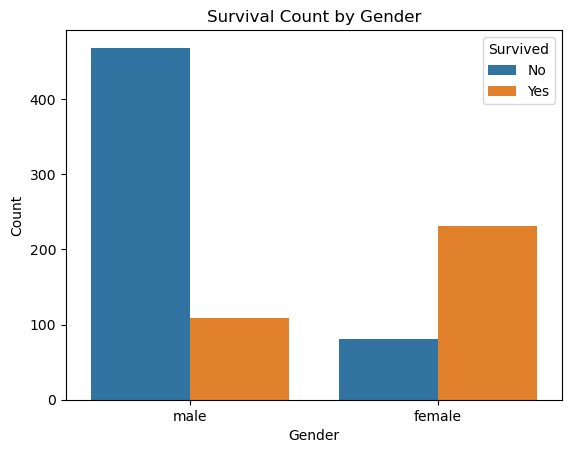

In [80]:
# Bar Chart of Survival by Gender

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

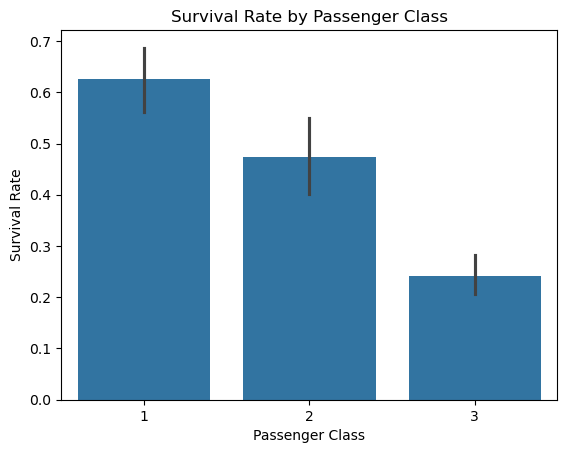

In [91]:
# Bar Chart of Survival by Class

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

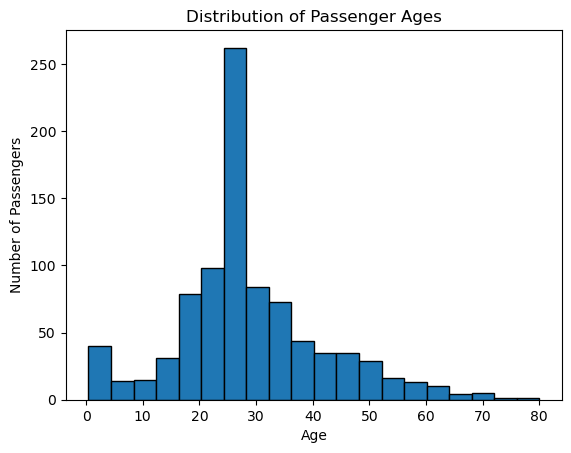

In [93]:
# Histogram of Passenger Ages

plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Conclusion




In [ ]:
1. Females had a significantly higher survival rate than males.
2. First-class passengers had higher survival chances compared to second and third classes.
3. Younger passengers (especially children) had higher survival rates than adults or seniors.